<a href="https://colab.research.google.com/github/monsund/unsupervised-classification-of-Linkedin-Profiles-using-KMeans-LDA-TFIDF/blob/master/gensim_LDA_corpus_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Gesim Libraries**

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# **Other Libraries**

In [ ]:
import spacy
import nltk 
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip show spacy

Name: spacy
Version: 2.2.4
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: thinc, srsly, blis, preshed, numpy, catalogue, tqdm, requests, plac, murmurhash, setuptools, cymem, wasabi
Required-by: fastai, en-core-web-sm


# **Import and Read File**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/NLP/with_swaraj/Data/linkedin_about_no_foreign_lang.csv')

In [ ]:
df = df.dropna()
df = df.drop(['cleaned_about_us', 'cluster'], axis=1)
df.head()

,url,username,title,about
0,https://www.linkedin.com/in/lokesh-kumar-xess-...,lokesh-kumar-xess-54814068,Marketing & Strategy at Mobistreak,I am a Google Adwords and Google Analytics cer...
1,https://in.linkedin.com/in/sujithnarayanan,sujithnarayanan,Reimagining Financial Services for India,Ideate. Execute. Disrupt. Iterate.
2,https://www.linkedin.com/in/adarshramakrishnan,adarshramakrishnan,Product Strategist | Product Manager | Triple ...,"Over the past decade, I have co-founded 3 vent..."
3,https://www.linkedin.com/in/rhythm-bhatnagar-4...,rhythm-bhatnagar-4350b551,Product Marketer | Ex-SHEROES | Early-Stage St...,"Hey,I am Rhythm. I am passionate about startup..."
4,https://www.linkedin.com/in/karthiksureshlbs,karthiksureshlbs,Product at Facebook | CMU MS | LBS MBA,I am a product-centric builder with experience...


# **Remove Punctuation**

In [ ]:
# define punctuation
punctuations = '\'!()-[]{};:\"\,<>./?#$%^&*_~'

In [ ]:
#Function for removing punctuation and lowering case
def remove_punct(text):
  for char in text:
    if char in punctuations:
      text = text.lower().replace(char,' ')    #lowering case
      text = text.replace('  ', ' ')
  return text

In [ ]:
df['about_cleaned']= df.about.apply(lambda x: remove_punct(x))
df.head(3)

,url,username,title,about,about_cleaned
0,https://www.linkedin.com/in/lokesh-kumar-xess-...,lokesh-kumar-xess-54814068,Marketing & Strategy at Mobistreak,I am a Google Adwords and Google Analytics cer...,i am a google adwords and google analytics cer...
1,https://in.linkedin.com/in/sujithnarayanan,sujithnarayanan,Reimagining Financial Services for India,Ideate. Execute. Disrupt. Iterate.,ideate execute disrupt iterate
2,https://www.linkedin.com/in/adarshramakrishnan,adarshramakrishnan,Product Strategist | Product Manager | Triple ...,"Over the past decade, I have co-founded 3 vent...",over the past decade i have co founded 3 ventu...


# **Remove Stopwords**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
additional_stop_words = set(['technology', 'development', 'experience', 'project', 'company'])

In [ ]:
stop_words = stop_words.union(additional_stop_words)

In [ ]:
# Function removing stopwords-----------
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [w for w in word_tokens if not w in stop_words]
  data = (' '.join(filtered_text))
  return data

In [ ]:
df['about_cleaned'] = df.about_cleaned.apply(lambda x: remove_stopwords(x))

# **Tokenize words and Clean-up text**


Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

Gensim’s ***simple_preprocess()*** is great for this. Additionally I have set **deacc=True** to remove the punctuations.

In [ ]:
# Gensim
import gensim
# import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), min_len=2, deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words= list(sent_to_words(df.about_cleaned))
print(data_words[0:3])
# when entire 'data_words' is printed it gives error saying 'IOPub data rate exceeded' because of large amount of data.

[['google', 'adwords', 'google', 'analytics', 'certified', 'ppc', 'expert', 'five', 'years', 'areas', 'search', 'engine', 'marketing', 'seo', 'ppc', 'website', 'speed', 'optimization', 'email', 'marketing', 'currently', 'working', 'manager', 'media', 'services', 'los', 'angeles', 'based', 'marketing', 'firm', 'mobistreak', 'inc', 'manage', 'monthly', 'adwords', 'spending', 'firm', 'portfolio', 'includes', 'cable', 'internet', 'dentist', 'auto', 'insurance', 'sr', 'insurance', 'health', 'insurance', 'mortgage', 'hotel', 'flight', 'booking', 'home', 'improvement', 'flower', 'delivery', 'industry', 'strong', 'ability', 'develop', 'understand', 'marketing', 'strategies', 'big', 'picture', 'campaign', 'level', 'feel', 'free', 'reach', 'interested', 'taking', 'business', 'next', 'level', 'effective', 'digital', 'advertising', 'strategy'], ['ideate', 'execute', 'disrupt', 'iterate'], ['past', 'decade', 'co', 'founded', 'ventures', 'elegant', 'solutions', 'inseyete', 'startship', 'provided', '

# **Creating Bigram and Trigram**

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=70) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=30) 

In [ ]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# # See trigram example
# # print(trigram_mod[bigram_mod[data_words[0]]])
# for i in range(1000):
#   print(bigram_mod[data_words[i]])

# **Create function for Making Bigram, Trigram and Lemmatization**

In [ ]:
def make_bigrams(words_list):
    return [bigram_mod[words] for words in words_list]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[words]] for words in words_list]

def lemmatization(texts, allowed_postags=['NOUN', 'PROPN' 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Form Bigrams 
data_words_bigram = make_bigrams(data_words)

# **Importing Spacy**

In [ ]:
% cd /content/drive/My Drive/NLP/with_swaraj/Code


In [ ]:
!pip install en_core_web_lg-2.1.0.tar.gz

In [ ]:
import spacy
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# Initialize spacy 'en_core_web_lg' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigram, allowed_postags=['NOUN', 'PROPN', 'ADJ', 'VERB', 'ADV'])

# **Saving data_lemmatized**

data_lemmatized is a list which contains list of words, document wise

In [ ]:
import pickle

#Saving Corpus 
with open("/content/drive/My Drive/NLP/with_swaraj/Data/data_list_for_lda_dictionary.json", "wb") as fp:   #Pickling
  pickle.dump(data_lemmatized, fp)

# **Create the Dictionary and Corpus needed for Topic Modeling**

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print(f'Total vocabulary size: {len(id2word)}')

Total vocabulary size: 41089


In [ ]:
# Create Corpus
texts = data_lemmatized

In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
corpus[9]

[(182, 1),
 (416, 1),
 (417, 1),
 (418, 1),
 (419, 2),
 (420, 1),
 (421, 1),
 (422, 1),
 (423, 1),
 (424, 1)]

# **Find Frequecy of words in corpus**

In [ ]:
dict_corpus = {}
for i in range(len(corpus)):
  for word_id, freq in corpus[i]:
    if id2word[word_id] in dict_corpus:
      dict_corpus[id2word[word_id]] += freq
    else:
      dict_corpus[id2word[word_id]] = freq


# **Making an Ordered Dictionary Type**

In [ ]:
import collections
od = collections.OrderedDict(sorted(dict_corpus.items()))

# **Creating DataFrame for word vs frequency**

In [ ]:
dict_corpus_list=[]
for word, freq in od.items():
  dic={'words':word, 'freq':freq}
  dict_corpus_list.append(dic)

dict_corpus_df = pd.DataFrame(dict_corpus_list)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # This line is for displaying entire dataframe
dict_corpus_df.sort_values('words')

# **Plotting histogram of word frequencies**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


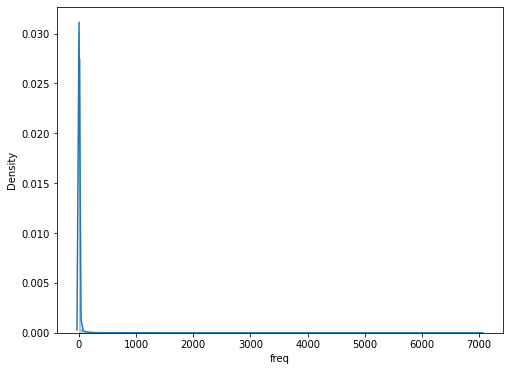

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(dict_corpus_df['freq'], bins=200);

In [ ]:
dict_corpus_df.sort_values('freq', ascending=False)[:20]

,words,freq
4871,business,7028
40059,work,5950
21968,management,5838
28644,product,5340
35971,team,3588
22228,marketing,3562
40423,year,3446
34832,strategy,2787
20675,lead,2527
4776,build,2525


In [ ]:
tot_words_freq_one = str(len(dict_corpus_df[dict_corpus_df['freq']==1]))
tot_words_freq_two = str(len(dict_corpus_df[dict_corpus_df['freq']==2]))
print(f'total words with frequency of 1: {tot_words_freq_one}')
print(f'total words with frequency of 2: {tot_words_freq_two}')

total words with frequency of 1: 17310
total words with frequency of 2: 12158


# **Removing low frequency words from dictionary**

In [ ]:
low_freq_words = dict_corpus_df[dict_corpus_df['freq']<3]
low_freq_words = low_freq_words.reset_index(drop=True)
low_freq_words[:20]

,words,freq
0,aaa,2
1,aaaif,1
2,aaaim,1
3,aaas,1
4,aadab,1
5,aadil,1
6,aaf,1
7,aagnya,1
8,aaifr,1
9,aaj,1


In [ ]:
ids=[id2word.token2id[low_freq_words['words'][i]] for i in range(len(low_freq_words))]
id2word.filter_tokens(bad_ids=ids)

In [ ]:
print(f'New vocabulary size: {len(id2word)}')

New vocabulary size: 11621


# **Filter extreme words**

In [ ]:
# Filter out words that occur in less than 10 documents, or more than
# 95% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.90)
print('Total Vocabulary Size:', len(id2word))


Total Vocabulary Size: 3775


# Creating Last version of **Corpus**

In [ ]:
print(id2word)

Dictionary(3775 unique tokens: ['ability', 'advertising', 'analytics', 'area', 'base']...)


In [ ]:
corpus = [id2word.doc2bow(text) for text in texts]

# **Save Corpus in .txt format using Pickle**

In [ ]:
import pickle

#Saving Corpus 
with open("/content/drive/My Drive/NLP/with_swaraj/Data/lda_corpus_bigram_threshold_70.txt", "wb") as fp:   #Pickling
  pickle.dump(corpus, fp)


#saving word dictionary (id2word)
with open("/content/drive/My Drive/NLP/with_swaraj/Data/lda_id2word_bigram_threshold_70.txt", "wb") as fp:   #Pickling
  pickle.dump(id2word, fp)

# **Load File**

In [ ]:
with open("/content/drive/My Drive/NLP/with_swaraj/Data/lda_corpus_bigram_threshold_70.txt", "rb") as fp:   # Unpickling
  b = pickle.load(fp)